In [70]:
# Importación de librerías
import pandas as pd
import numpy as np
import graphviz

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import impute

In [71]:
# Carga de datos
df = pd.read_csv('../data/raw/train.csv')
df_predict = pd.read_csv('../data/raw/test.csv')

In [72]:
# Definición de parámetros del modelo
par_target = "Survived"
par_features = ["Pclass", "Sex"]

In [73]:
# Preprocesamiento
X = df.loc[:, par_features]
X['Sex'][X['Sex'] == "female"] = 0
X['Sex'][X['Sex'] == "male"] = 1
y = df[par_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [74]:
# primer modelo 
modelo_1 = tree.DecisionTreeClassifier()
modelo_1 = modelo_1.fit(X_train, y_train)

In [75]:
# Evaluación del modelo: metrica accuracy
y_pred_1 = modelo_1.predict(X_test)
acc_modelo_1 = metrics.accuracy_score(y_test, y_pred_1)
print(acc_modelo_1)


0.746268656716418


In [76]:
# Evaluación del modelo: matriz de confusión
cm_modelo_1 = metrics.confusion_matrix(y_pred_1, y_test)

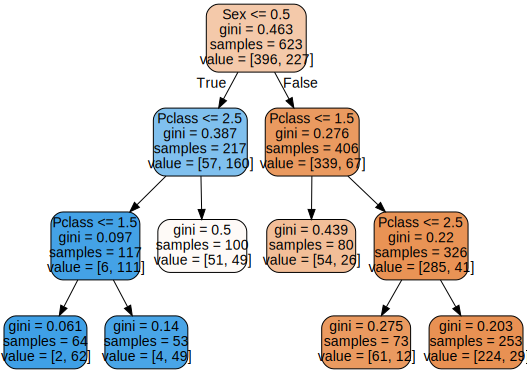

In [77]:

# Evaluación del modelo: visualización de arbol de decisión
aux = tree.export_graphviz(modelo_1, out_file=None, filled = True, rounded=True, feature_names=["Pclass", "Sex"])
graf = graphviz.Source(aux)
graf.render('../work/002_decision_tree_basic_2_modelo_1') # exportación a pdf
graf

In [78]:
# generación de un modelo prod
X_predict = df_predict.loc[:, par_features]
X_predict['Sex'][X_predict['Sex'] == "female"] = 0
X_predict['Sex'][X_predict['Sex'] == "male"] = 1

modelo_final_1 = tree.DecisionTreeClassifier()
modelo_final_1 = modelo_final_1.fit(X,y)

y_final = modelo_final_1.predict(X_predict)
df_predict['Survived'] = y_final
df_final = df_predict[['PassengerId', 'Survived']]
df_final.to_csv('../output/003_decision_tree_basico_a.csv', index=False)

# Modelo 2

In [79]:
# Definición de parámetros del modelo
par_target_2 = "Survived"
par_features_2 = ['Pclass', 'Sex', 'Age']

In [80]:
# Preprocesamiento
X = df.loc[:, par_features_2]
X['Sex'][X['Sex'] == 'female'] = 0
X['Sex'][X['Sex'] == 'male'] = 1

# imputación de nulos
imp = impute.SimpleImputer(missing_values=np.NaN, strategy='mean')
imp.fit(X)
X = imp.transform(X)

y = df.loc[:,par_target_2]

# creación train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [81]:
# entrenamiento del modelo
modelo_2 = tree.DecisionTreeClassifier()
modelo_2 = modelo_2.fit(X_train, y_train)



In [82]:
# evaluación
y_pred_2 = modelo_2.predict(X_test)
acc_modelo_2 = metrics.accuracy_score(y_test, y_pred_2)
print(acc_modelo_2)

0.753731343283582


In [83]:
# evaluación: confusion matrix
cm_modelo_2 = metrics.confusion_matrix(y_test, y_pred_2)

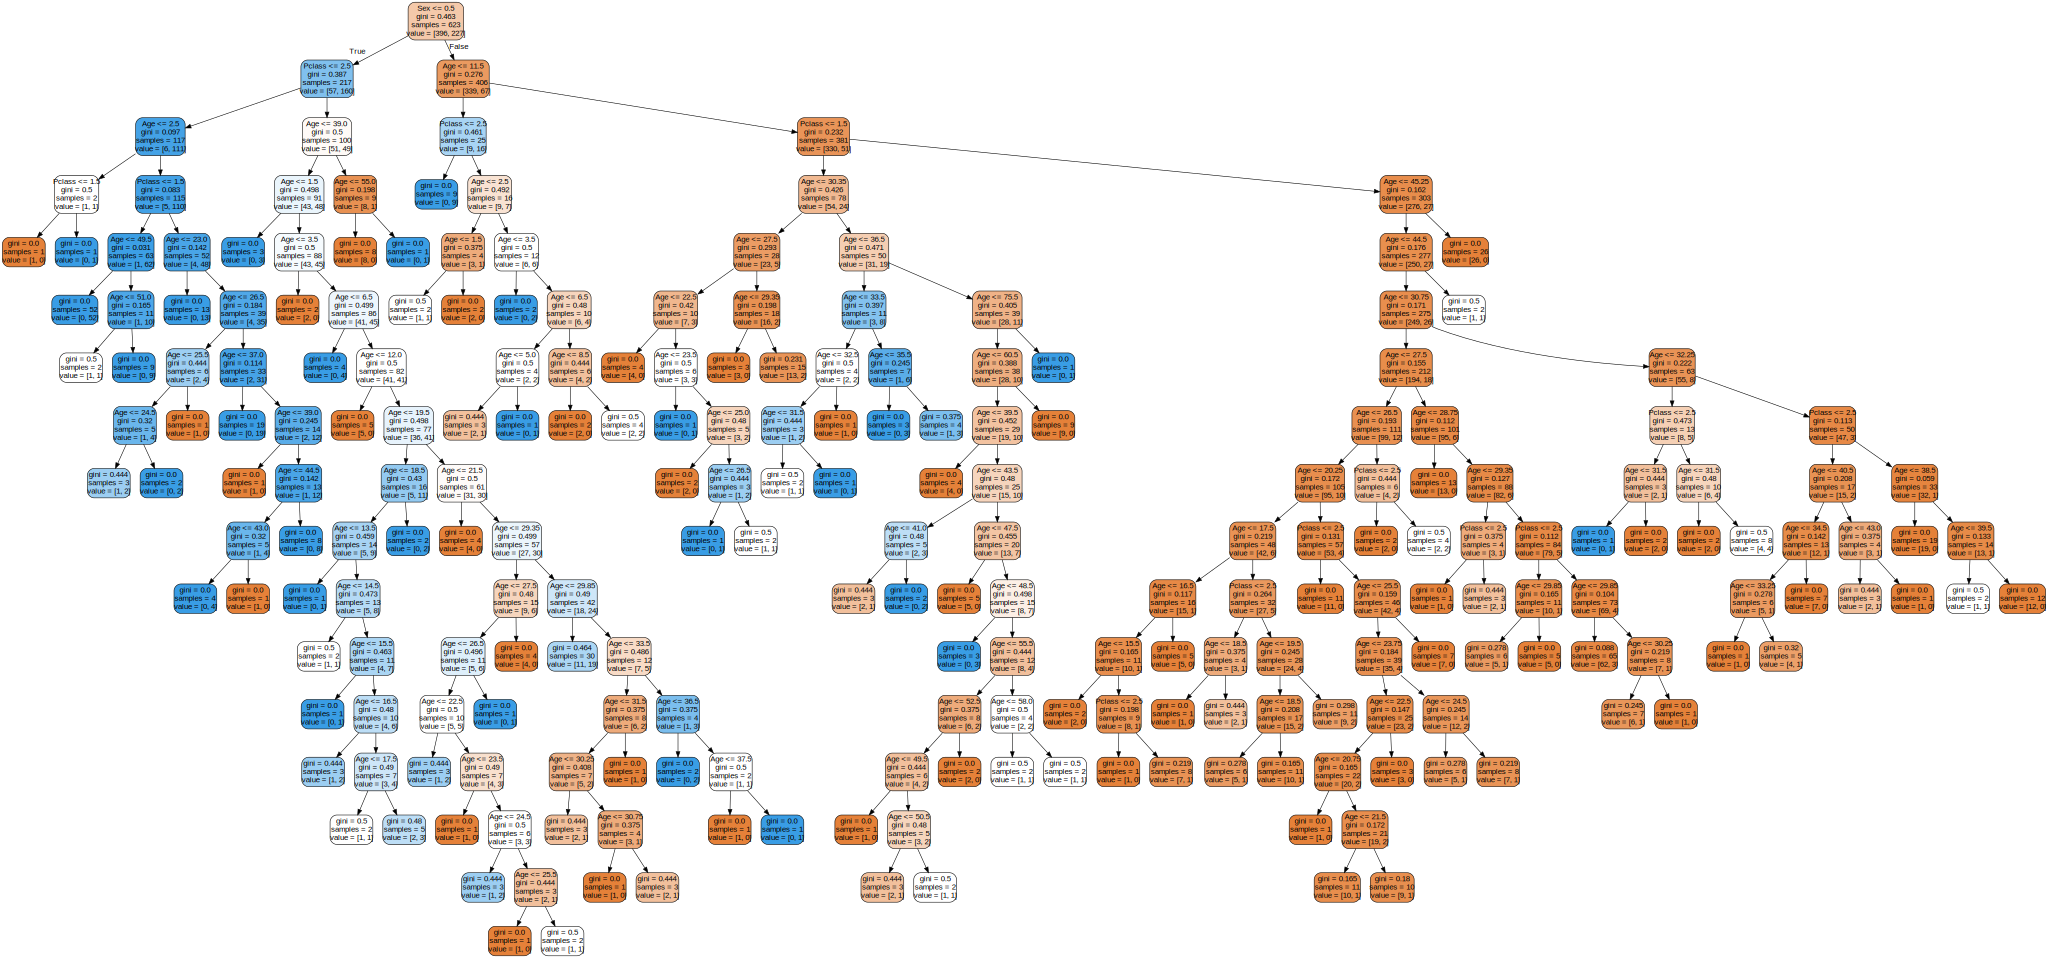

In [84]:
aux = tree.export_graphviz(modelo_2, out_file=None, filled = True, rounded=True, feature_names=["Pclass", "Sex", "Age"])
graf = graphviz.Source(aux)
graf.render('../work/002_decision_tree_basic_2_modelo_2') # exportación a pdf
graf

In [85]:
X_predict = df_predict.loc[:, par_features_2]
X_predict['Sex'][X_predict['Sex'] == "female"] = 0
X_predict['Sex'][X_predict['Sex'] == "male"] = 1

# imputación de nulos
imp = impute.SimpleImputer(missing_values=np.NaN, strategy='mean')
imp.fit(X_predict)
X_predict = imp.transform(X_predict)

modelo_final_2 = tree.DecisionTreeClassifier()
modelo_final_2 = modelo_final_2.fit(X,y)

y_final = modelo_final_2.predict(X_predict)
df_predict['Survived'] = y_final
df_final = df_predict[['PassengerId', 'Survived']]
df_final.to_csv('../output/003_decision_tree_basico_b.csv', index=False)